# Introduction
Welcome to this graded Python exercise.

In this graded exercise, you will apply your learnings from the **Time Series Analysis** module and solve a real-world problem related to airline management.

## Problem Statement
In this exercise, you will apply time series modelling techniques to a real-world problem that involves an airline company and its passenger count data that it has collected over the years. The company has historical passenger count data that it has captured over a period of time and wishes to forecast future passenger counts so that it may optimise its budgeting and resource management processes.

The problem statement for this demonstration can be summarised as follows:
> Given historical passenger count data of an airline company, forecast its future passenger counts.

By studying the forecast, the company can effectively plan for future demands.

## Data Description
You have been provided with a data set containing monthly passenger count data of the airline company for the period 1949 to 1960. The data set has the following attributes:

<table>
  <tr>
    <th> Attributes </th>
    <th> Description <th>
  </tr>
  <tr>
    <td> Month </td>
    <td> The month for which passenger count was recorded (in yyyy-mm format) </td>
  </tr>
  <tr>
    <td> Passengers </td>
    <td> Number of air passengers in a particular month </td>
  </tr>

</table>

## Outline
In this exercise, you will:
- Prepare the data for time series modelling
- Forecast passenger count using the following models:
  - Linear regression
  - Naive
  - Simple average
  - Simple moving average
  - Simple exponential smoothing
  - Holt's
  - Holt-Winters' additive
  - Holt-Winters' multiplicative
  - Autotegressive (AR)
  - Moving average (MA)
  - Autoregressive moving average (ARMA)
  - Autoregressive integrated moving average (ARIMA)
  - Seasonal autoregressive integrated moving average (SARIMA)

You will analyse the performance of these models using root mean squared error (RMSE) and mean absolute percentage error (MAPE).

# Part 1 - Setup and Data Preparation
In this section, you will:
- Import necessary packages for executing the code
- Load the data
- Prepare the data for further analysis

In [342]:
# Import 'numpy' and 'pandas' for working with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualisations
from matplotlib import pyplot as plt
import seaborn as sns

# Import 'seasonal_decompose' from 'statsmodels' for seasonal decomposition of time series
from statsmodels.tsa.seasonal import seasonal_decompose

# Import 'LinearRegression' from 'sklearn' for building regression models
from sklearn.linear_model import LinearRegression

# Import 'SimpleExpSmoothing' from 'statsmodels' for simple exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Import 'ExponentialSmoothing' from 'statsmodels' for exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error

# Import 'plot_acf' from 'statsmodels' to compute and visualise the autocorrelation function (ACF) for the time series
from statsmodels.graphics.tsaplots import plot_acf

# Import 'plot_pacf' from 'statsmodels' to compute and visualise the partial autocorrelation function (ACF) for the time series
from statsmodels.graphics.tsaplots import plot_pacf

# Import the 'boxcox' method from 'scipy' to implement the Box-Cox transformation
from scipy.stats import boxcox

# Import 'ARIMA' from 'statsmodels' for building autoregressive models
from statsmodels.tsa.arima.model import ARIMA

# Import 'SARIMAX' from 'statsmodels' for building autoregressive models
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Import and execute method for suppressing warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [343]:
# Load the data and take a look at it using the '.head()' method
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [344]:
# View specifics of the data frame using the '.info()' method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [345]:
# Convert the 'Month' feature to the 'datetime' data type using the '.to_datetime()' method
df['Month'] = pd.to_datetime(df['Month'])

In [346]:
# View specifics of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [347]:
# Ensure that the data are ordered chronologically using the '.sort_values()' method
df.sort_values(by='Month', inplace=True)

In [348]:
# Set the index of the data frame to 'Month' using the '.set_index()' method
df.set_index('Month', inplace=True)

In [349]:
# Take a look at the data using the '.head()' method
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


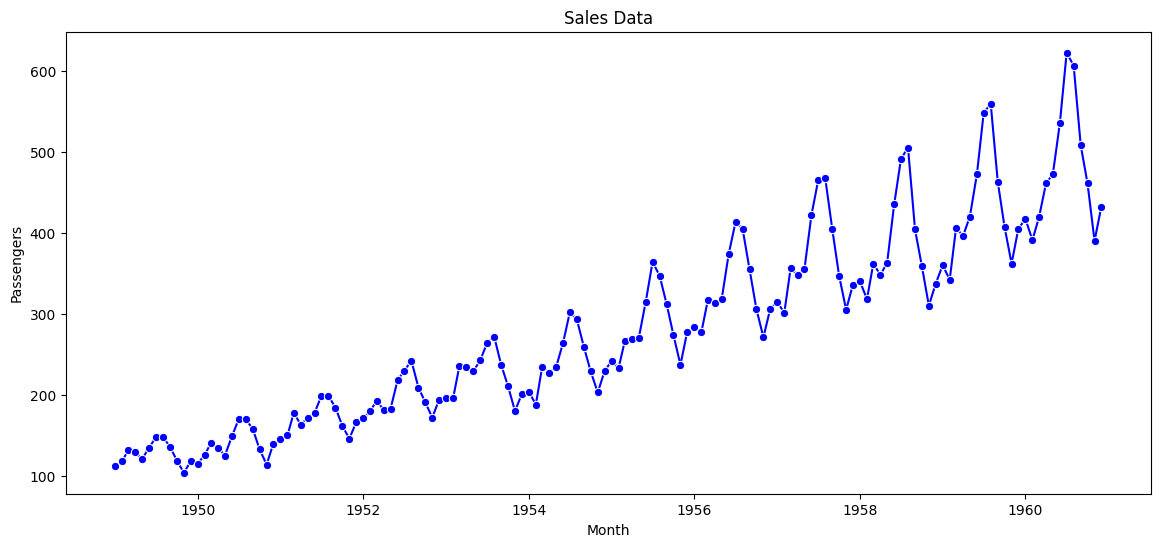

In [350]:
# Plot the time series data
plt.figure(figsize = (14, 6))
sns.lineplot(data = df, x = 'Month', y = 'Passengers', marker = 'o', color = 'blue')
plt.title('Sales Data');

In [351]:
# Take a look at the shape of the data using the '.shape' attribute
df.shape

(144, 1)

In [352]:
# Split the data into training and testing data sets
train_len = 120
df_train = df[:train_len] # first 120 months as training set
df_test = df[train_len:] # last 24 months as out-of-time test set

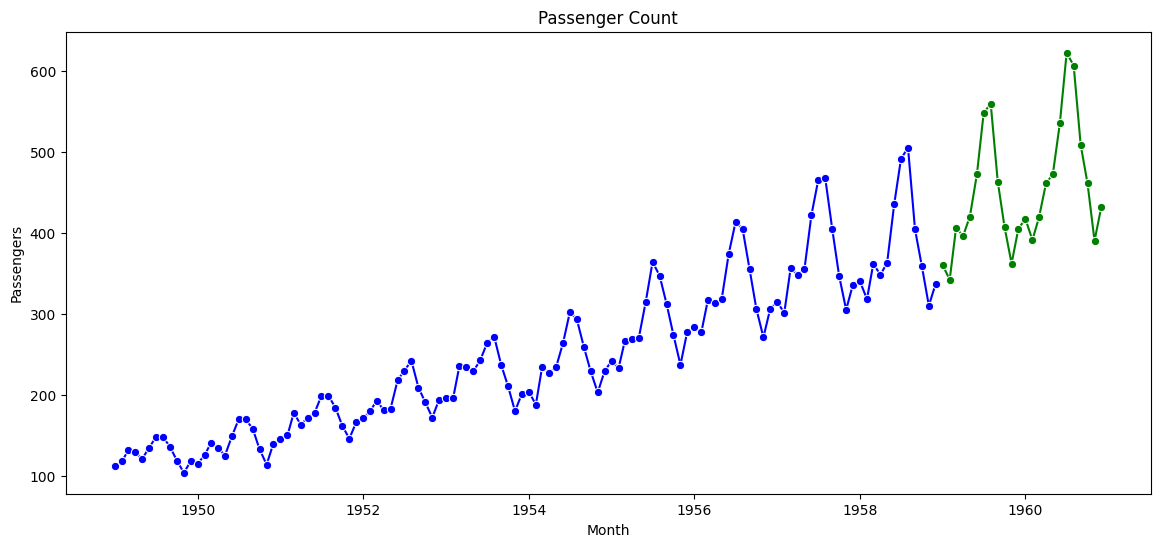

In [353]:
# Plot the time series data with the train-test split
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Month', y = 'Passengers', marker = 'o', color = 'blue')
sns.lineplot(data = df_test, x = 'Month', y = 'Passengers', marker = 'o', color = 'green')
plt.title('Passenger Count');

# Part 2 - Simple Time Series Models
In this part of the demonstration, you will fit basic models to the data and analyse their performance using RMSE and MAPE values. You will build following models:
- Linear regression
- Naive
- Simple average
- Simple moving average

### Subpart 1 - Linear Regression Method

In [354]:
# Create the independent variable for the linear regression model
linreg_X = np.array(range(len(df_train))).reshape(-1, 1)  # Time index as independent variable

In [355]:
# Convert the training variables into 2D arrays using the '.reshape()' method
linreg_X = linreg_X.reshape(-1, 1)
linreg_y = np.array(df_train['Passengers']).reshape(-1, 1)

In [356]:
# Create and fit a linear regression model to the training data using the 'LinearRegression()' and the '.fit()' methods
linreg_model = LinearRegression()
linreg_model.fit(linreg_X, linreg_y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [357]:
# Create the independent variable for the complete data set and reshape it accordingly
linreg_X_all = np.array(range(len(df))).reshape(-1, 1)
linreg_X_all = linreg_X_all.reshape(-1, 1)

In [358]:
# Generate the complete regression line including both the training and testing data using the '.predict()' method
y_pred_lr = linreg_model.predict(linreg_X_all)

In [359]:
# Convert the predictions into a 1D array using the '.reshape()' method
y_pred_lr = y_pred_lr.reshape(-1)

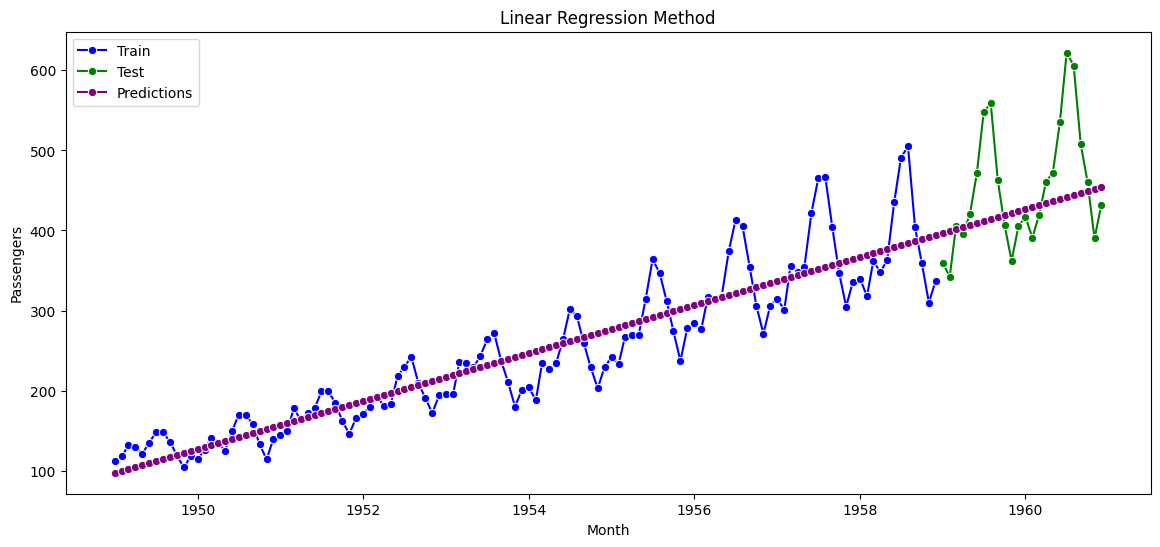

In [360]:
# Visualise the time series data and the predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Month', y = 'Passengers', label = 'Train', marker = 'o', color = 'blue')
sns.lineplot(data = df_test, x = 'Month', y = 'Passengers', label = 'Test', marker = 'o', color = 'green')
sns.lineplot(data = df, x = 'Month', y = y_pred_lr, label = 'Predictions', marker = 'o', color = 'purple')
plt.legend(loc = 'best')
plt.title('Linear Regression Method');

In [361]:
# Summarise the performance of the model on the test data using RMSE and MAPE
y_pred_lr_list = y_pred_lr[train_len:]

rmse = np.sqrt(mean_squared_error(y_true = df_test['Passengers'], y_pred = y_pred_lr_list))
mape = np.mean(np.abs(df_test['Passengers'] - y_pred_lr_list) / df_test['Passengers']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df = pd.DataFrame(index = [0],
                              data = {'Model': 'Linear Regression', 'RMSE': rmse, 'MAPE': mape})

performance_df.set_index(keys = 'Model', inplace = True)

performance_df

,RMSE,MAPE
Model,,
Linear Regression,74.79,11.22


### Subpart 2 -  Naive Method

In [362]:
# Generate predictions for the test data for the naive method
y_pred_n = df_train['Passengers'].iloc[-1]

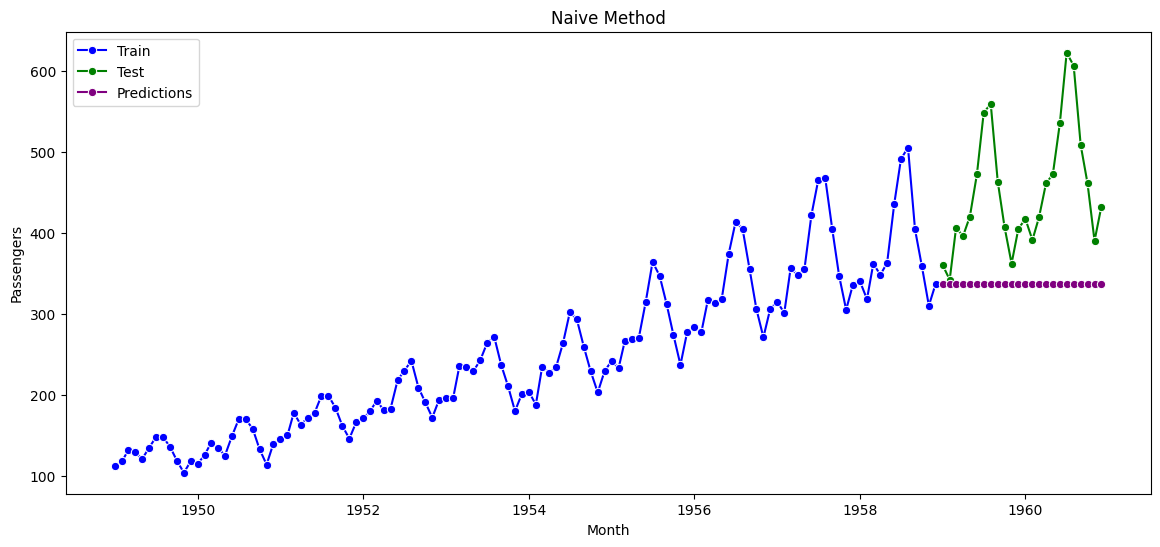

In [363]:
# Visualise the time series data and the predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Month', y = 'Passengers', label = 'Train', marker = 'o', color = 'blue')
sns.lineplot(data = df_test, x = 'Month', y = 'Passengers', label = 'Test', marker = 'o', color = 'green')
sns.lineplot(data = df_test, x = 'Month', y = y_pred_n, label = 'Predictions', marker = 'o', color = 'purple')
plt.legend(loc = 'best')
plt.title('Naive Method');

In [364]:
# Summarise the performance of the model on the test data using RMSE and MAPE
y_pred_n_list = [y_pred_n] * len(df_test)

rmse = np.sqrt(mean_squared_error(y_true = df_test['Passengers'], y_pred = y_pred_n_list))
mape = np.mean(np.abs(df_test['Passengers'] - y_pred_n_list) / df_test['Passengers']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'Naive', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
Linear Regression,74.79,11.22
Naive,137.33,23.58


### Subpart 3 -  Simple Average Method

In [365]:
# Generate predictions for the test data using the simple average method
y_pred_sa = df_train['Passengers'].mean()

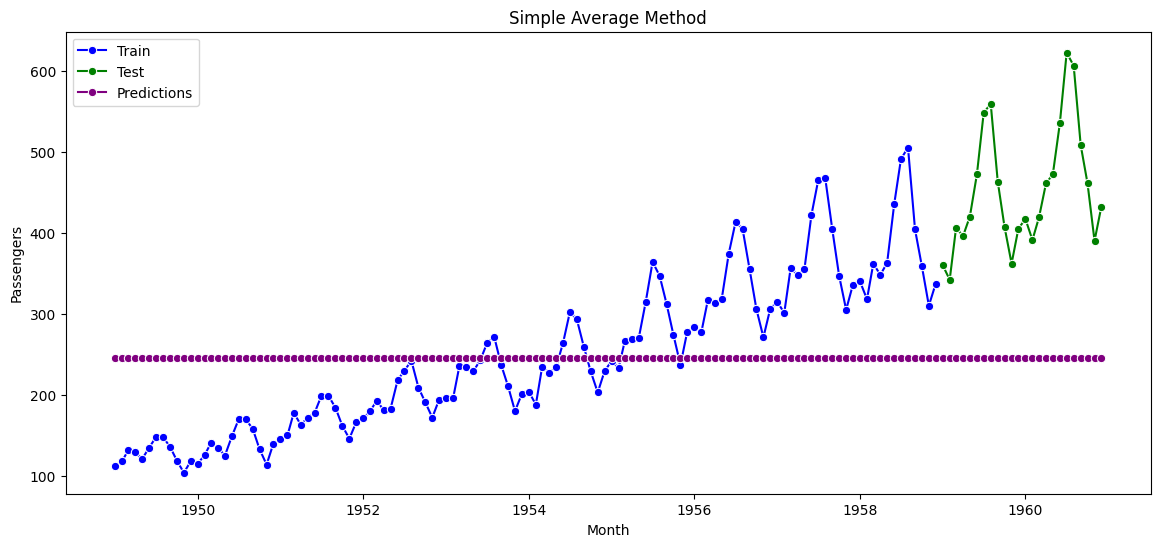

In [366]:
# Visualise the time series data and the predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Month', y = 'Passengers', label = 'Train', marker = 'o', color = 'blue')
sns.lineplot(data = df_test, x = 'Month', y = 'Passengers', label = 'Test', marker = 'o', color = 'green')
sns.lineplot(data = df, x = 'Month', y = y_pred_sa, label = 'Predictions', marker = 'o', color = 'purple')
plt.legend(loc = 'best')
plt.title('Simple Average Method');

In [367]:
# Summarise the performance of the model on the test data using RMSE and MAPE
y_pred_sa_list = [y_pred_sa] * len(df_test)

rmse = np.sqrt(mean_squared_error(y_true = df_test['Passengers'], y_pred = y_pred_sa_list))
mape = np.mean(np.abs(df_test['Passengers'] - y_pred_sa_list) / df_test['Passengers']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'Simple Average', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
Linear Regression,74.79,11.22
Naive,137.33,23.58
Simple Average,219.44,44.23


### Subpart 4 -  Simple Moving Average Method

In [368]:
# Generate predictions for the complete data using the simple moving average method with a window size of 3
# Note: Use the '.rolling()', the .mean()' and the '.shift()' methods accordingly
ma_window = 3
y_pred_sma = df['Passengers'].rolling(window=ma_window).mean().shift(1)
y_pred_sma = y_pred_sma.fillna(method='bfill')
y_pred_sma[train_len:] = y_pred_sma[train_len:]

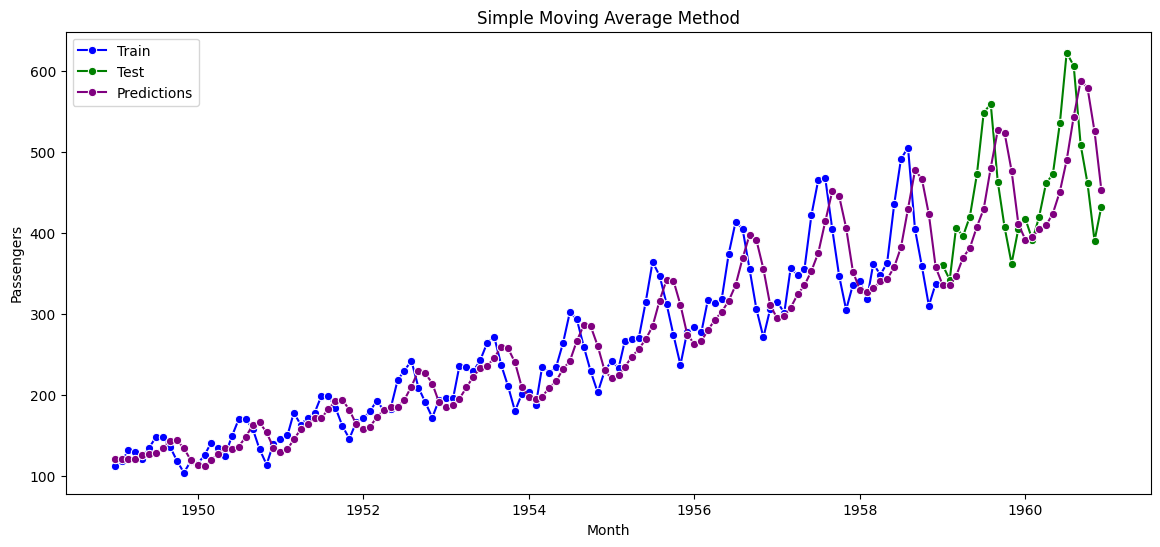

In [369]:
# Visualise the time series data and the predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Month', y = 'Passengers', label = 'Train', marker = 'o', color = 'blue')
sns.lineplot(data = df_test, x = 'Month', y = 'Passengers', label = 'Test', marker = 'o', color = 'green')
sns.lineplot(data = df, x = 'Month', y = y_pred_sma, label = 'Predictions', marker = 'o', color = 'purple')
plt.legend(loc = 'best')
plt.title('Simple Moving Average Method');

In [370]:
# Summarise the performance of the model on the test data using RMSE and MAPE
y_pred_sma_list = [y_pred_sma[train_len]] * len(df_test)

rmse = np.sqrt(mean_squared_error(y_true = df_test['Passengers'], y_pred = y_pred_sma_list))
mape = np.mean(np.abs(df_test['Passengers'] - y_pred_sma_list) / df_test['Passengers']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'Simple Moving Average', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
Linear Regression,74.79,11.22
Naive,137.33,23.58
Simple Average,219.44,44.23
Simple Moving Average,138.73,23.96


# Part 3 - Exponential Time Series Models
In this part of the exercise, you will fit exponential smoothing models to the data. The models that you will build are:
- Simple exponential smoothing
- Holt's exponential smoothing
- Holt Winters' exponential smoothing

### Subpart 1 -  Simple Exponential Smoothing

In [371]:
# Create a model instance for the training data using the 'SimpleExpSmoothing()' method
model = SimpleExpSmoothing(df_train['Passengers'])

In [372]:
# Fit the model object on the training data using the '.fit()' method
# Note: Set 'optimized' to 'True'
model = model.fit(optimized=True)

In [373]:
# Obtain predictions for the test data using the '.forecast()' method
y_pred_ses = model.forecast(steps=len(df_test))

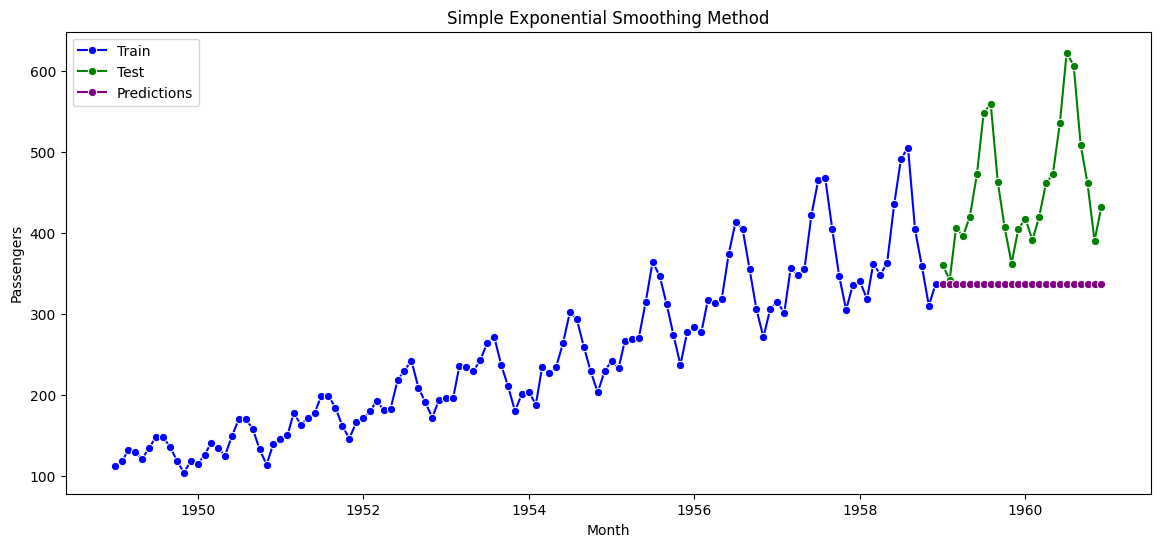

In [374]:
# Visualise the time series data and the predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Month', y = 'Passengers', label = 'Train', marker = 'o', color = 'blue')
sns.lineplot(data = df_test, x = 'Month', y = 'Passengers', label = 'Test', marker = 'o', color = 'green')
sns.lineplot(data = df, x = 'Month', y = y_pred_ses, label = 'Predictions', marker = 'o', color = 'purple')
plt.legend(loc = 'best')
plt.title('Simple Exponential Smoothing Method');

In [375]:
# Summarise the performance of the model on the test data using RMSE and MAPE
y_pred_ses_list = [y_pred_ses[0]] * len(df_test)

rmse = np.sqrt(mean_squared_error(y_true = df_test['Passengers'], y_pred = y_pred_ses_list))
mape = np.mean(np.abs(df_test['Passengers'] - y_pred_ses_list) / df_test['Passengers']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'Simple Exponential Smoothing', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
Linear Regression,74.79,11.22
Naive,137.33,23.58
Simple Average,219.44,44.23
Simple Moving Average,138.73,23.96
Simple Exponential Smoothing,137.33,23.58


### Subpart 2 - Holt's Method

In [376]:
# Create a model instance for the training data using the 'ExponentialSmoothing()' method
# Note: Set 'seasonal_periods' to 12, 'trend' to 'additive' and 'seasonal' to 'None'
model = ExponentialSmoothing(df_train['Passengers'], seasonal_periods=12, trend='additive', seasonal=None)

In [377]:
# Fit the model object on the training data using the '.fit()' method
# Note: Set 'optimized' to 'True'
model = model.fit(optimized=True)

In [378]:
# Obtain predictions for the test data using the '.forecast()' method
y_pred_hes = model.forecast(steps=len(df_test))

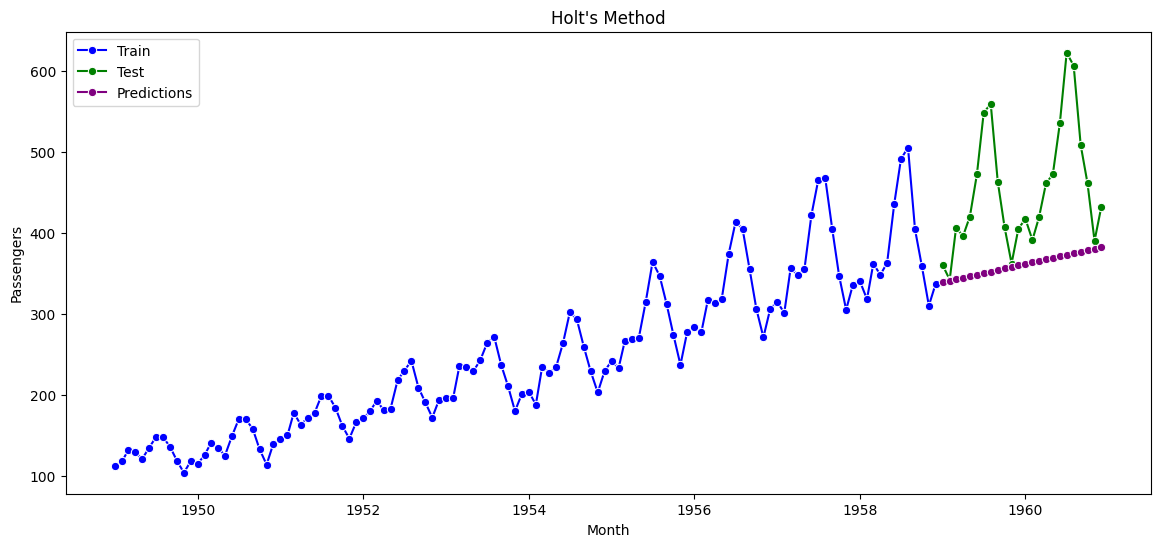

In [379]:
# Visualise the time series data and the predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Month', y = 'Passengers', label = 'Train', marker = 'o', color = 'blue')
sns.lineplot(data = df_test, x = 'Month', y = 'Passengers', label = 'Test', marker = 'o', color = 'green')
sns.lineplot(data = df_test, x = 'Month', y = y_pred_hes, label = 'Predictions', marker = 'o', color = 'purple')
plt.legend(loc = 'best')
plt.title('Holt\'s Method');

In [380]:
# Summarise the performance of the model on the test data using RMSE and MAPE
y_pred_hes_list = y_pred_hes

rmse = np.sqrt(mean_squared_error(y_true = df_test['Passengers'], y_pred = y_pred_hes_list))
mape = np.mean(np.abs(df_test['Passengers'] - y_pred_hes_list) / df_test['Passengers']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'Holt\'s', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
Linear Regression,74.79,11.22
Naive,137.33,23.58
Simple Average,219.44,44.23
Simple Moving Average,138.73,23.96
Simple Exponential Smoothing,137.33,23.58
Holt's,115.70,18.41


### Subpart 3 - Holt-Winters' Additive Method

In [381]:
# Create a model instance for the training data using the 'ExponentialSmoothing()' method
# Note: Set 'seasonal_periods' to 12, 'trend' to 'additive' and 'seasonal' to 'additive'
model = ExponentialSmoothing(df_train['Passengers'], seasonal_periods=12, trend='additive', seasonal='additive')

In [382]:
# Fit the model object on the training data using the '.fit()' method
# Note: Set 'optimized' to 'True'
model = model.fit(optimized=True)

In [383]:
# Obtain predictions for the test data using the '.forecast()' method
y_pred_hwa = model.forecast(steps=len(df_test))

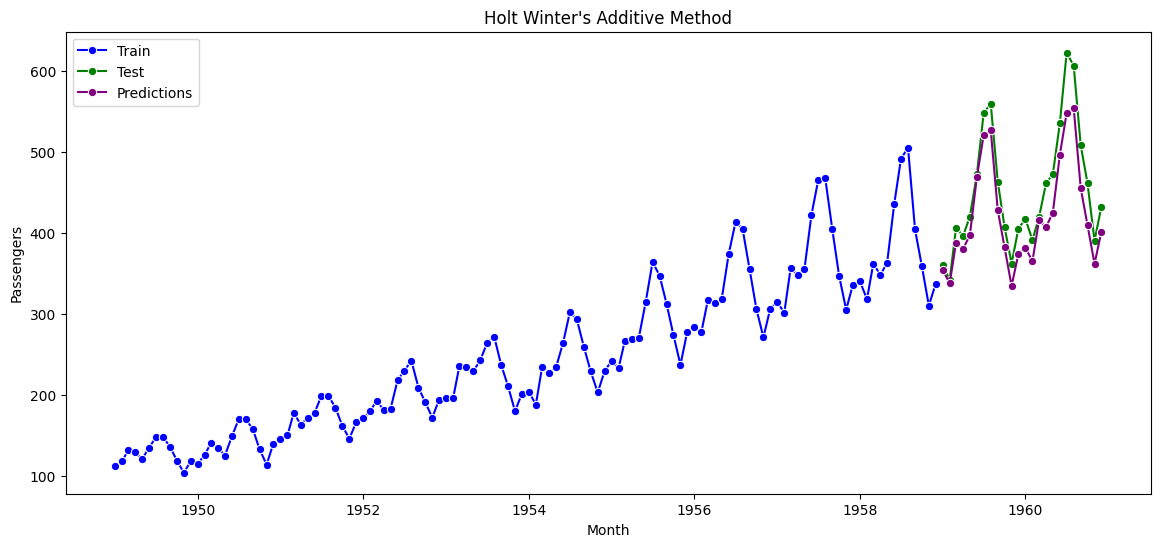

In [384]:
# Visualise the time series data and the predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Month', y = 'Passengers', label = 'Train', marker = 'o', color = 'blue')
sns.lineplot(data = df_test, x = 'Month', y = 'Passengers', label = 'Test', marker = 'o', color = 'green')
sns.lineplot(data = df_test, x = 'Month', y = y_pred_hwa, label = 'Predictions', marker = 'o', color = 'purple')
plt.legend(loc = 'best')
plt.title('Holt Winter\'s Additive Method');

In [385]:
# Summarise the performance of the model on the test data using RMSE and MAPE
y_pred_hwa_list = y_pred_hwa

rmse = np.sqrt(mean_squared_error(y_true = df_test['Passengers'], y_pred = y_pred_hwa_list))
mape = np.mean(np.abs(df_test['Passengers'] - y_pred_hwa_list) / df_test['Passengers']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'Holt Winter\'s Additive', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
Linear Regression,74.79,11.22
Naive,137.33,23.58
Simple Average,219.44,44.23
Simple Moving Average,138.73,23.96
Simple Exponential Smoothing,137.33,23.58
Holt's,115.70,18.41
Holt Winter's Additive,35.76,6.64


### Subpart 4 - Holt-Winters' Multiplicative Method

In [386]:
# Create a model instance for the training data using the 'ExponentialSmoothing()' method
# Note: Set 'seasonal_periods' to 12, 'trend' to 'additive' and 'seasonal' to 'multiplicative'
model = ExponentialSmoothing(df_train['Passengers'], seasonal_periods=12, trend='additive', seasonal='multiplicative')

In [387]:
# Fit the model object on the training data using the '.fit()' method
# Note: Set 'optimized' to 'True'
model = model.fit(optimized=True)

In [388]:
# Obtain predictions for the test data using the '.forecast()' method
y_pred_hwm = model.forecast(steps=len(df_test))

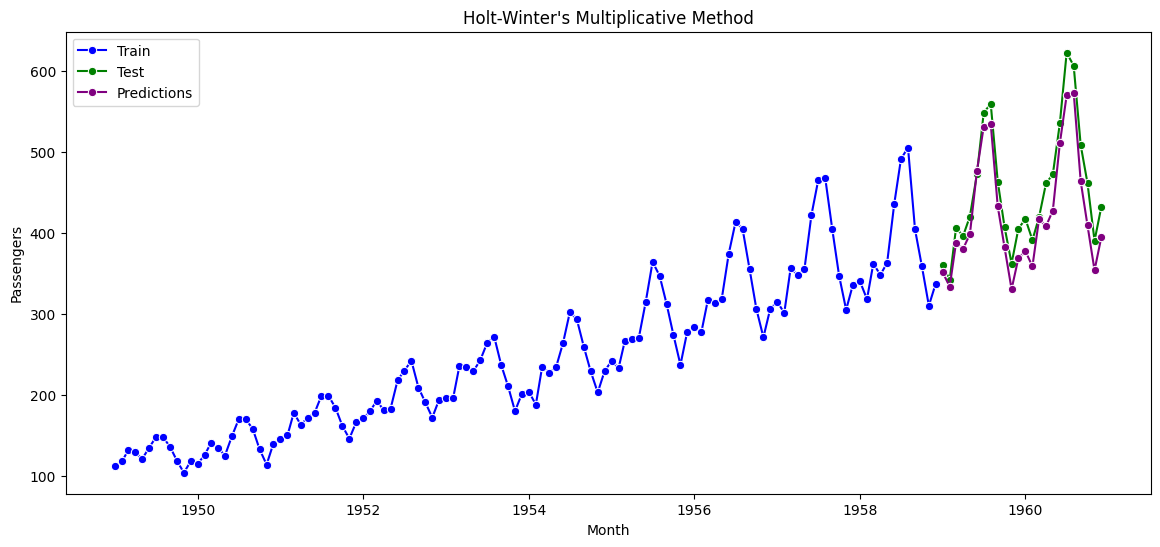

In [389]:
# Visualise the time series data and the predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Month', y = 'Passengers', label = 'Train', marker = 'o', color = 'blue')
sns.lineplot(data = df_test, x = 'Month', y = 'Passengers', label = 'Test', marker = 'o', color = 'green')
sns.lineplot(data = df_test, x = 'Month', y = y_pred_hwm, label = 'Predictions', marker = 'o', color = 'purple')
plt.legend(loc = 'best')
plt.title('Holt-Winter\'s Multiplicative Method');

In [390]:
# Summarise the performance of the model on the test data using RMSE and MAPE
y_pred_hwm_list = y_pred_hwm

rmse = np.sqrt(mean_squared_error(y_true = df_test['Passengers'], y_pred = y_pred_hwm_list))
mape = np.mean(np.abs(df_test['Passengers'] - y_pred_hwm_list) / df_test['Passengers']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'Holt Winter\'s Multiplicative', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
Linear Regression,74.79,11.22
Naive,137.33,23.58
Simple Average,219.44,44.23
Simple Moving Average,138.73,23.96
Simple Exponential Smoothing,137.33,23.58
Holt's,115.70,18.41
Holt Winter's Additive,35.76,6.64
Holt Winter's Multiplicative,32.49,6.39


# Part 4 - Autoregressive Models
In this part of the demonstration, you will fit autoregressive models. You will build following models:
- Autotegressive (AR)
- Moving average (MA)
- Autoregressive moving average (ARMA)
- Autoregressive integrated moving average (ARIMA)
- Seasonal autoregressive integrated moving average (SARIMA)

### Subpart 0 - Transformation and Differencing

In [391]:
# Apply the Box-Cox transformation on the training data using the 'boxcox' method
# Note: Convert the resulting list into a Pandas Series with a suitable index
# Note: Use 'lmbda = 0'
df_boxcox = pd.Series(boxcox(df_train['Passengers'], lmbda=0), index=df_train.index)

In [392]:
# Apply the differencing transformation on the Box-Cox transformed training data
df_boxcox_diff = df_boxcox.diff().dropna()

### Subpart 1 - Autoregressive (AR) Method

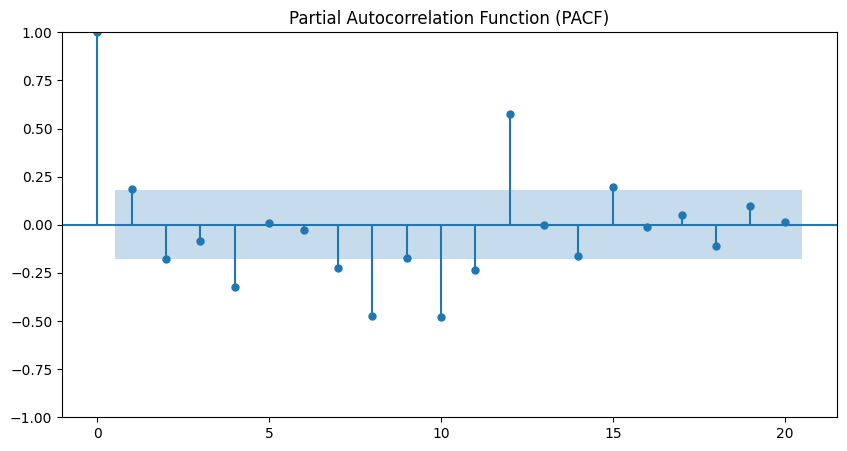

In [393]:
# Use the 'plot_pacf' method to look at the partial autocorrelation values for the training data for various lag orders
# Note: The 'plot_pacf' method assumes stationarity of time series, so use the 'df_boxcox_diff' data
# Note: Since differencing results in a missing value at the beginning of 'df_boxcox_diff', we must exclude it
plt.figure(figsize = (10, 5))
plot_pacf(df_boxcox_diff, lags = 20, ax = plt.gca())
plt.title('Partial Autocorrelation Function (PACF)');

In [394]:
# Fit an AR model to the transformed training data with lag order 7 and view its optimal parameter values
# Note: Higher lag orders can be used at the cost of model complexity, but for this exercise, kindly use 'p = 7'
# Note: ARIMA(7, 0, 0) = AR(7)
ar_model = ARIMA(df_boxcox_diff, order=(7, 0, 0))
ar_model = ar_model.fit()
ar_model.params

const     0.009993
ar.L1     0.169733
ar.L2    -0.227714
ar.L3    -0.103753
ar.L4    -0.353444
ar.L5    -0.039726
ar.L6     0.001715
ar.L7    -0.225236
sigma2    0.008609
dtype: float64

In [395]:
# Obtain predictions from the AR model for the testing data indices using the '.predict()' method
ar_model_preds = ar_model.predict(start=df_test.index[0], end=df_test.index[-1])

In [396]:
# Append 'ar_model_preds' with 'df_boxcox_diff' to prepare the data for inverse transformation
df_boxcox_diff_preds = pd.concat([df_boxcox_diff, ar_model_preds])

In [397]:
# Reverse the differencing transformation that was done on the data using the '.cumsum()' method on 'df_boxcox_diff_preds'
# Note: Remember to add the constant 'df_boxcox[0]' to all the values as well
df_boxcox_preds = df_boxcox_diff_preds.cumsum() + df_boxcox.iloc[0]

In [398]:
# Reverse the Box-Cox transformation that was done on the data by exponentiating the values in 'df_boxcox_preds'
df_preds = np.exp(df_boxcox_preds)

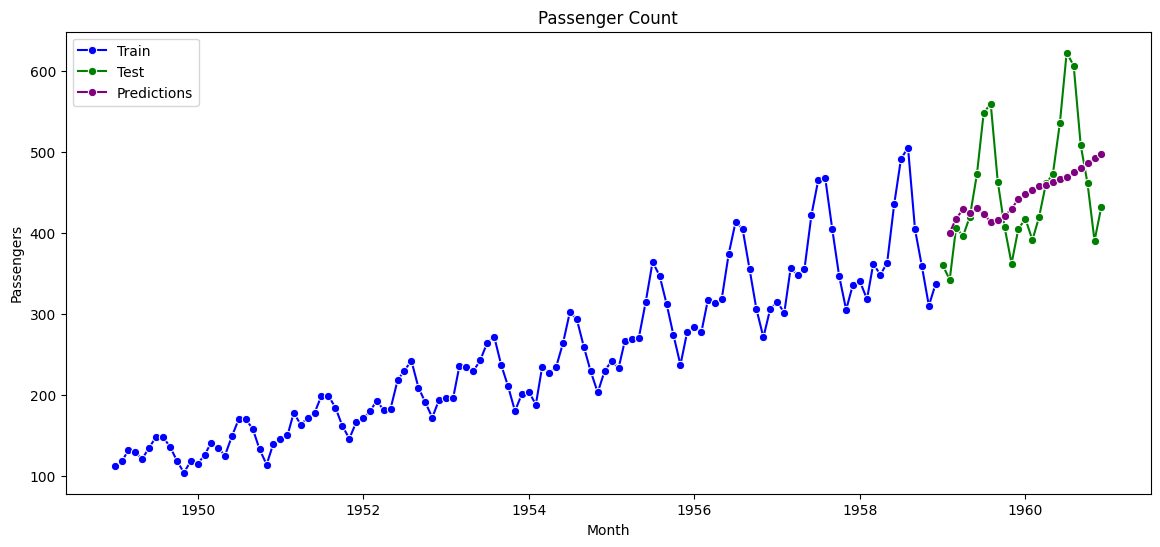

In [399]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Month', y = 'Passengers', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Month', y = 'Passengers', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Passenger Count');

In [400]:
# Summarise the performance of the model on the test data using RMSE and MAPE
# FIX: Use .tail(24) or align by index to ensure we get the matching 24 months
y_pred_aligned = df_preds.loc[df_test.index]

rmse = np.sqrt(mean_squared_error(y_true = df_test['Passengers'], y_pred = y_pred_aligned))
mape = np.mean(np.abs(df_test['Passengers'] - y_pred_aligned) / df_test['Passengers']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df = pd.DataFrame(index = [0],
                              data = {'Model': 'AR', 'RMSE': rmse, 'MAPE': mape})

performance_df.set_index(keys = 'Model', inplace = True)

performance_df

,RMSE,MAPE
Model,,
AR,70.57,11.62


### Subpart 2 - Moving Average (MA) Method

Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

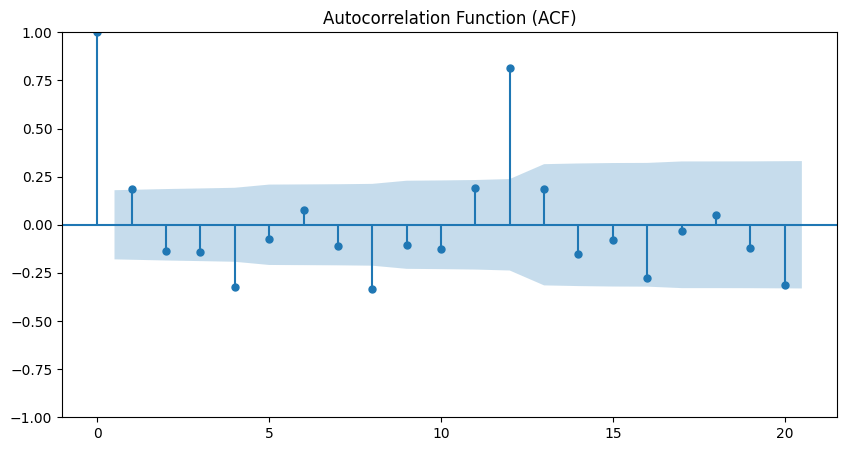

In [401]:
# Use the 'plot_acf' method to look at the autocorrelation values for the training data for various lag orders
# Note: The 'plot_acf' method assumes stationarity of time series, so use the 'df_boxcox_diff' data
# Note: Since differencing results in a missing value at the beginning of 'df_boxcox_diff', we must exclude it
plt.figure(figsize = (10, 5))
plot_acf(df_boxcox_diff, lags = 20, ax = plt.gca())
plt.title('Autocorrelation Function (ACF)')

In [402]:
# Fit an MA model to the transformed training data with lag order 4 and view its optimal parameter values
# Note: Higher lag orders can be used at the cost of model complexity, but for this exercise, kindly use 'q = 4'
# Note: ARIMA(0, 0, 4) = AR(4)
ma_model = ARIMA(df_boxcox_diff, order=(0, 0, 4))
ma_model = ma_model.fit()
ma_model.params

const     0.010567
ma.L1     0.018945
ma.L2    -0.329550
ma.L3    -0.221076
ma.L4    -0.448495
sigma2    0.007474
dtype: float64

In [403]:
# Obtain predictions from the MA model for the testing data indices using the '.predict()' method
ma_model_preds = ma_model.predict(start=df_test.index[0], end=df_test.index[-1])

In [404]:
# Append 'ma_model_preds' with 'df_boxcox_diff' to prepare the data for inverse transformation
df_boxcox_diff_preds = pd.concat([df_boxcox_diff, ma_model_preds])

In [405]:
# Reverse the differencing transformation that was done on the data using the '.cumsum()' method on 'df_boxcox_diff_preds'
# Note: Remember to add the constant 'df_boxcox[0]' to all the values as well
df_boxcox_preds = df_boxcox_diff_preds.cumsum() + df_boxcox.iloc[0]

In [406]:
# Reverse the Box-Cox transformation that was done on the data by exponentiating the values in 'df_boxcox_preds'
df_preds = np.exp(df_boxcox_preds)

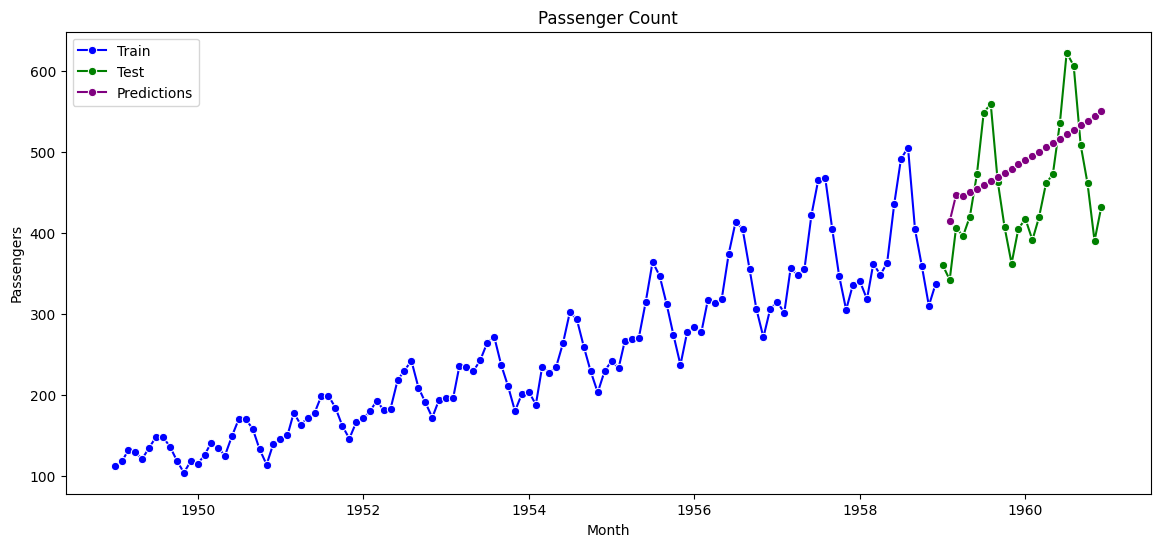

In [407]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Month', y = 'Passengers', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Month', y = 'Passengers', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Passenger Count');

In [408]:
# Summarise the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Passengers'], y_pred = df_preds.loc[df_test.index]))
mape = np.mean(np.abs(df_test['Passengers'] - df_preds.loc[df_test.index]) / df_test['Passengers']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'MA', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
AR,70.57,11.62
MA,76.28,15.33


### Subpart 3 - Autoregressive Moving Average (ARMA) Method

In [409]:
# Fit an ARMA model to the transformed training data with lag orders 'p = 7' and 'q = 4' and view its optimal parameter values
# Note: ARIMA(7, 0, 4) = ARMA(7, 4)
arma_model = ARIMA(df_boxcox_diff, order=(7, 0, 4))
arma_model = arma_model.fit()
arma_model.params

const     0.010652
ar.L1    -0.389299
ar.L2    -0.193008
ar.L3     0.015002
ar.L4    -0.082484
ar.L5    -0.417447
ar.L6     0.009687
ar.L7    -0.216252
ma.L1     0.448037
ma.L2    -0.071675
ma.L3    -0.550674
ma.L4    -0.802161
sigma2    0.006230
dtype: float64

In [410]:
# Obtain predictions from the ARMA model for the testing data indices using the '.predict()' method
arma_model_preds = arma_model.predict(start=df_test.index[0], end=df_test.index[-1])

In [411]:
# Append 'arma_model_preds' with 'df_boxcox_diff' to prepare the data for inverse transformation
df_boxcox_diff_preds = pd.concat([df_boxcox_diff, arma_model_preds])

In [412]:
# Reverse the differencing transformation that was done on the data using the '.cumsum()' method on 'df_boxcox_diff_preds'
# Note: Remember to add the constant 'df_boxcox[0]' to all the values as well
df_boxcox_preds = df_boxcox_diff_preds.cumsum() + df_boxcox.iloc[0]

In [413]:
# Reverse the Box-Cox transformation that was done on the data by exponentiating the values in 'df_boxcox_preds'
df_preds = np.exp(df_boxcox_preds)

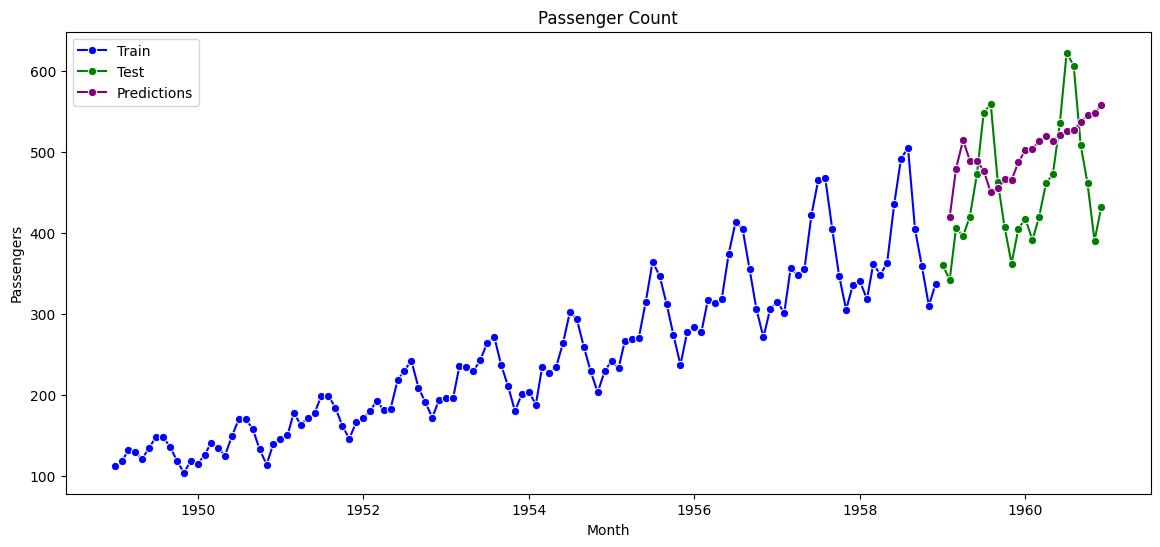

In [414]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Month', y = 'Passengers', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Month', y = 'Passengers', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Passenger Count');

In [415]:
# Summarise the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Passengers'], y_pred = df_preds.loc[df_test.index]))
mape = np.mean(np.abs(df_test['Passengers'] - df_preds.loc[df_test.index]) / df_test['Passengers']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'ARMA', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
AR,70.57,11.62
MA,76.28,15.33
ARMA,83.45,17.22


### Subpart 4 - Autoregressive Integrated Moving Average (ARIMA) Method

In [416]:
# Fit an ARIMA model to the transformed training data with lag orders 'p = 7' and 'q = 4' and view its optimal parameter values
# Note: Since differencing is integrated, the endogenous variable to be used here is 'df_boxcox'
# Note: Use a differencing order of 1
arima_model = ARIMA(df_boxcox, order=(7, 1, 4))
arima_model = arima_model.fit()
arima_model.params

ar.L1     0.837437
ar.L2    -0.623712
ar.L3     0.478069
ar.L4    -0.742467
ar.L5     0.156533
ar.L6     0.051596
ar.L7    -0.457830
ma.L1    -0.948413
ma.L2     0.467331
ma.L3    -0.813546
ma.L4     0.891779
sigma2    0.004445
dtype: float64

In [417]:
# Obtain predictions from the ARIMA model for the testing data indices using the '.predict()' method
arima_model_preds = arima_model.predict(start=df_test.index[0], end=df_test.index[-1])

In [418]:
# Append 'arima_model_preds' with 'df_boxcox' to prepare the data for inverse transformation
df_boxcox_preds = pd.concat([df_boxcox, arima_model_preds])

In [419]:
# Reverse the Box-Cox transformation that was done on the data by exponentiating the values in 'df_boxcox_preds'
df_preds = np.exp(df_boxcox_preds)

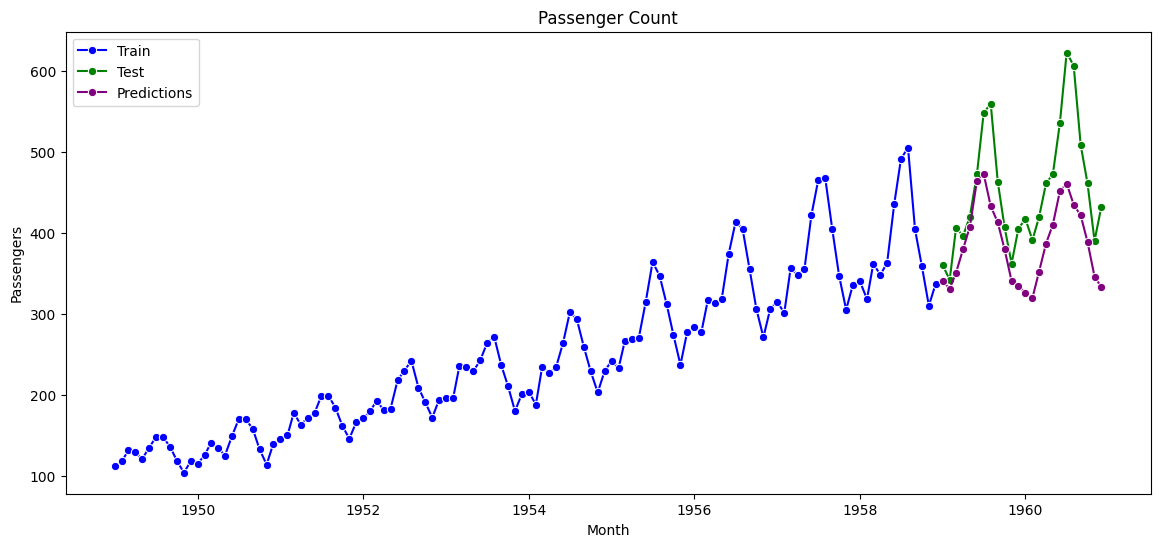

In [420]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Month', y = 'Passengers', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Month', y = 'Passengers', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Passenger Count');

In [421]:
# Summarise the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Passengers'], y_pred = df_preds.loc[df_test.index]))
mape = np.mean(np.abs(df_test['Passengers'] - df_preds.loc[df_test.index]) / df_test['Passengers']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'ARIMA', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
AR,70.57,11.62
MA,76.28,15.33
ARMA,83.45,17.22
ARIMA,78.71,13.79


### Subpart 5 - Seasonal Autoregressive Integrated Moving Average (SARIMA) Method

In [422]:
# Fit a SARIMA model to the transformed training data with lag orders 'p = 7' and 'q = 4' and view its optimal parameter values
# Note: Since differencing is integrated, the endogenous variable to be used here is 'df_boxcox'
# Note: Use a differencing order of 1
# Note: Use seasonal parameters of 'P = 0', 'D = 1', 'Q = 0', 'm = 3'
sarima_model = SARIMAX(df_boxcox, order=(7, 1, 4), seasonal_order=(0, 1, 0, 3))
sarima_model = sarima_model.fit()
sarima_model.params

ar.L1    -0.116340
ar.L2     0.096918
ar.L3    -0.458941
ar.L4    -0.319233
ar.L5     0.197769
ar.L6    -0.312690
ar.L7    -0.148789
ma.L1     0.497198
ma.L2    -0.002566
ma.L3    -0.943494
ma.L4    -0.494623
sigma2    0.005883
dtype: float64

In [423]:
# Obtain predictions from the SARIMA model for the testing data indices using the '.predict()' method
sarima_model_preds = sarima_model.predict(start=df_test.index[0], end=df_test.index[-1])

In [424]:
# Append 'sarima_model_preds' with 'df_boxcox' to prepare the data for inverse transformation
df_boxcox_preds = pd.concat([df_boxcox, sarima_model_preds])

In [425]:
# Reverse the Box-Cox transformation that was done on the data by exponentiating the values in 'df_boxcox_preds'
df_preds = np.exp(df_boxcox_preds)

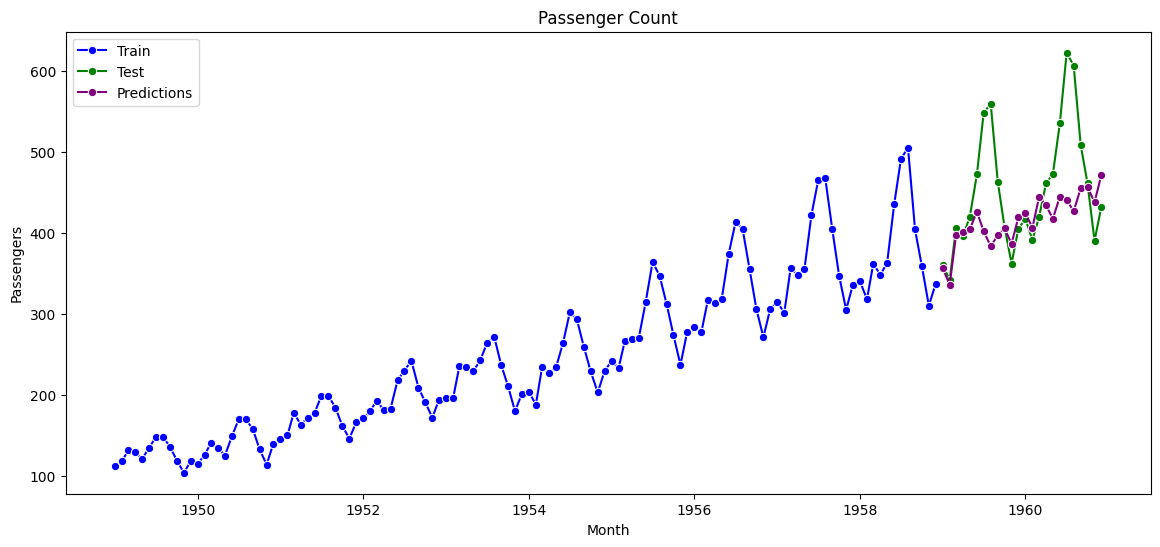

In [426]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Month', y = 'Passengers', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Month', y = 'Passengers', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Passenger Count');

In [427]:
# Summarise the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Passengers'], y_pred = df_preds.loc[df_test.index]))
mape = np.mean(np.abs(df_test['Passengers'] - df_preds.loc[df_test.index]) / df_test['Passengers']) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'SARIMA', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
AR,70.57,11.62
MA,76.28,15.33
ARMA,83.45,17.22
ARIMA,78.71,13.79
SARIMA,77.62,10.00
